In [ ]:
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
import os
import time

Część 1:
Pobieranie danych

In [ ]:
output_dir = "./project/Projekt-pogoda/pobrane"
output_dir_unzip = "./project/Projekt-pogoda/pobrane_unzip"

os.makedirs(output_dir, exist_ok=True)
os.makedirs(output_dir_unzip, exist_ok=True)

for year in range(2001, 2024):
    for month in range(1, 13):
        filename = f"dane_{year}_{month:02d}.zip"
        url = f"https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/{year}/{year}_{month:02d}_k.zip"

        print(f"Pobieranie: {url}")

        os.system(f'powershell Invoke-WebRequest -Uri "{url}" -OutFile "{output_dir}/{filename}"')
        os.system(f'powershell Expand-Archive -Path "{output_dir}/{filename}" -Force -DestinationPath "{output_dir_unzip}"')
        time.sleep(1)

        for file in os.listdir(f"{output_dir_unzip}"):
            if file.startswith('k_d_t'):
                os.remove(f"{output_dir_unzip}/{file}")

Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_01_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_02_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_03_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_04_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_05_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_06_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_07_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/d

PermissionError: [WinError 5] Odmowa dostępu: 'C:/Users/Admin/Desktop/project/Projekt-pogoda/pobrane'

Część 1:
Scalanie danych

In [ ]:
output = r"./project/Projekt-pogoda/data/data.csv"
base_dir = r"./project/Projekt-pogoda/pobrane_unzip"

folder_path = os.path.dirname(output)
os.makedirs(folder_path, exist_ok=True)
first = True

for year in range(2001, 2024):
    for month in range(1, 13):
        plik = f"k_d_{month:02d}_{year}.csv"
        folder = os.path.join(base_dir, plik)

        if os.path.exists(folder):
            df = pd.read_csv(folder, header=None, encoding='cp1250')

            df.to_csv(
                output,
                mode="w" if first else "a",
                index=False,
                header=None,
                encoding='utf-8'
            )
            first = False

NameError: name 'os' is not defined

Część 1:
Usunięcie niepotrzebnych kolumn

In [ ]:
df = pd.read_csv('data.csv', header=None, usecols=[1, 2, 3, 4, 5, 7, 9])
df.to_csv(
                output,
                mode="w",
                index=False,
                header=None,
            )

ParserError: Defining usecols with out-of-bounds indices is not allowed. [7, 9] are out of bounds.

In [29]:
#Data Frame z pozostałych danych

df = pd.read_csv('data.csv', header=None)
df.columns = ['Stacja', 'Rok', 'Miesiąc', 'Dzień', 'Maksymalna temperatura', 'Minimalna temperatura', 'Średnia temperatura']
df

,Stacja,Rok,Miesiąc,Dzień,Maksymalna temperatura,Minimalna temperatura,Średnia temperatura
0,PSZCZYNA,2001,1,1,-1.3,-9.6,-5.7
1,PSZCZYNA,2001,1,2,3.3,-12.0,-2.7
2,PSZCZYNA,2001,1,3,1.5,-5.7,-1.5
3,PSZCZYNA,2001,1,4,6.5,-1.1,1.9
4,PSZCZYNA,2001,1,5,6.5,-2.3,2.8
...,...,...,...,...,...,...,...
1031401,OLECKO,2023,12,27,5.9,0.2,2.1
1031402,OLECKO,2023,12,28,3.9,-1.4,1.4
1031403,OLECKO,2023,12,29,5.9,3.0,4.5
1031404,OLECKO,2023,12,30,6.4,3.3,4.5


Część 2:
Polecenie 1 – Znalezienie miast z pełną historią pomiarów

In [30]:
counts = df["Stacja"].value_counts()

full_hist=[]
for miasto in df["Stacja"]:
    if counts.loc[miasto] == 8400:
        if miasto not in full_hist:
            full_hist.append(miasto)
    else:
        continue

print("Miasta z pełną historią:",full_hist)

Miasta z pełną historią: ['PSZCZYNA', 'BRENNA', 'JABŁONKA', 'ŁAZY', 'JASTRZĘBIA', 'ŁĄCKO', 'KROŚCIENKO', 'NIEDZICA', 'BUKOWINA TATRZAŃSKA', 'DOLINA PIĘCIU STAWÓW', 'SOLINA-JAWOR', 'KOMAŃCZA', 'LGOTA GÓRNA', 'KRAKÓW-OBSERWATORIUM', 'STASZÓW', 'JAROCIN', 'CEBER', 'JARCZEW', 'GORZYŃ', 'WIELICHOWO', 'LEGIONOWO', 'SZEPIETOWO', 'BIAŁOWIEŻA', 'GOLENIÓW', 'CHRZĄSTOWO', 'BIEBRZA-PIEŃCZYKÓWEK', 'RÓŻANYSTOK', 'GDAŃSK-RĘBIECHOWO', 'LIDZBARK WARMIŃSKI']


Część 2:
Polecenie 2 – Wykres pomiarów dla wybranej stacji z niepełną historią

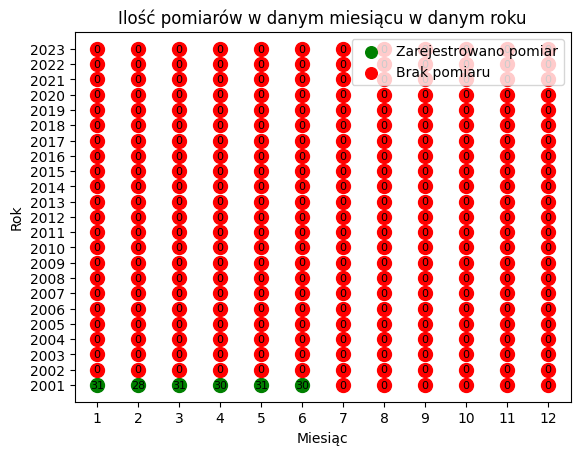

In [31]:
unfull_city = df[df["Stacja"].isin(["PRZEMYŚL"])]

days_per_month = unfull_city.groupby(["Rok","Miesiąc"])["Dzień"].nunique()
counts = days_per_month.unstack(fill_value=0)

for y in range(2001,2024):
    for x in range(1,13):
        if ((unfull_city["Rok"] == y) & (unfull_city["Miesiąc"] == x)).any():
            days = counts.loc[y, x]
            color = "green"
        else:
            color = "red"
            days = 0
        plt.scatter(x, y, color=color, s=100)
        if days>=0:
            plt.text(x, y, str(days), color="black",
                     ha='center', va='center', fontsize=8)


plt.scatter([], [], color="green", s=70, label="Zarejestrowano pomiar")
plt.scatter([], [], color="red", s=70, label="Brak pomiaru")
plt.xticks(ticks=range(1,13), labels=range(1,13))
plt.yticks(ticks=range(2001,2024), labels=range(2001,2024))
plt.xlabel("Miesiąc")
plt.ylabel("Rok")
plt.title("Ilość pomiarów w danym miesiącu w danym roku")
plt.legend()
plt.show()

Część 2:
Polecenie 3 – Wykres średniej dziennej temperatury w zależności od liczby dni, jakie upłynęły od 01.01.2001 dla wybranej stacji z pełną historią

In [32]:
full_city = df[df["Stacja"].isin(["DOLINA PIĘCIU STAWÓW"])]

running_sum = 0
count = 0
running_avr_temp = []

for temp in full_city["Średnia temperatura"]:
    running_sum += temp
    count += 1
    current_mean = running_sum / count
    running_avr_temp.append(current_mean)

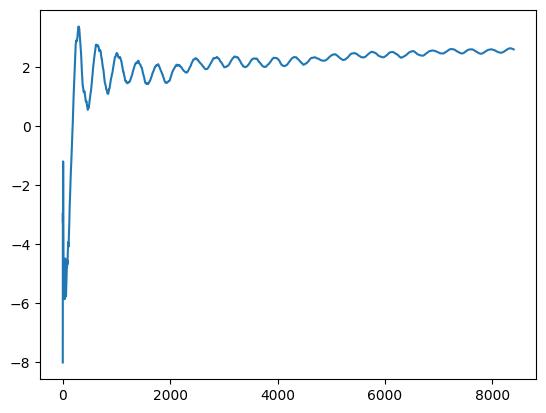

In [ ]:
#Sposób 1
plt.plot(running_avr_temp)

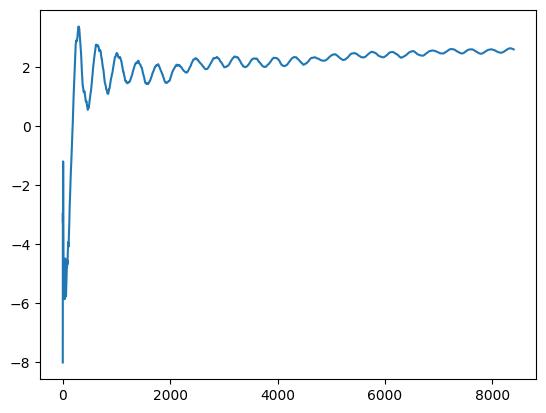

In [ ]:
#Sposób 2
plt.plot(full_city["Średnia temperatura"].reset_index(drop=True).expanding().mean())

Część 2:
Polecenie 4 – Znalezienie najmniejszej zarejestrowanej temperatury minimalnej i największej zarejestrowanej temperatury maksymalnej

In [35]:
lowest = df["Minimalna temperatura"].min()
highest = df["Maksymalna temperatura"].max()


lowest_temp = df[df["Minimalna temperatura"] == lowest]
lowest_temp = lowest_temp[["Stacja", "Minimalna temperatura", "Dzień", "Miesiąc", "Rok"]]
highest_temp = df[df["Maksymalna temperatura"] == highest]
highest_temp = highest_temp[["Stacja", "Maksymalna temperatura", "Dzień", "Miesiąc", "Rok"]]

In [36]:
lowest_temp

,Stacja,Minimalna temperatura,Dzień,Miesiąc,Rok
870241,JABŁONKA,-37.3,8,1,2017


In [37]:
highest_temp

,Stacja,Maksymalna temperatura,Dzień,Miesiąc,Rok
831911,CEBER,39.0,8,8,2015


Część 2:
Polecenie 5b – Wykres średniej temperatury miesięcznej dla każdego miesiąca każdego roku 

In [212]:
full_city = df[df["Stacja"].isin(["DOLINA PIĘCIU STAWÓW"])]

avg_multi_group = (full_city.groupby(['Rok', 'Miesiąc'])['Średnia temperatura'].mean()).to_frame().reset_index()
avg_multi_group

,Rok,Miesiąc,Średnia temperatura
0,2001,1,-5.012903
1,2001,2,-6.567857
2,2001,3,-2.367742
3,2001,4,-0.276667
4,2001,5,6.138710
...,...,...,...
271,2023,8,13.400000
272,2023,9,10.700000
273,2023,10,5.651613
274,2023,11,-2.656667


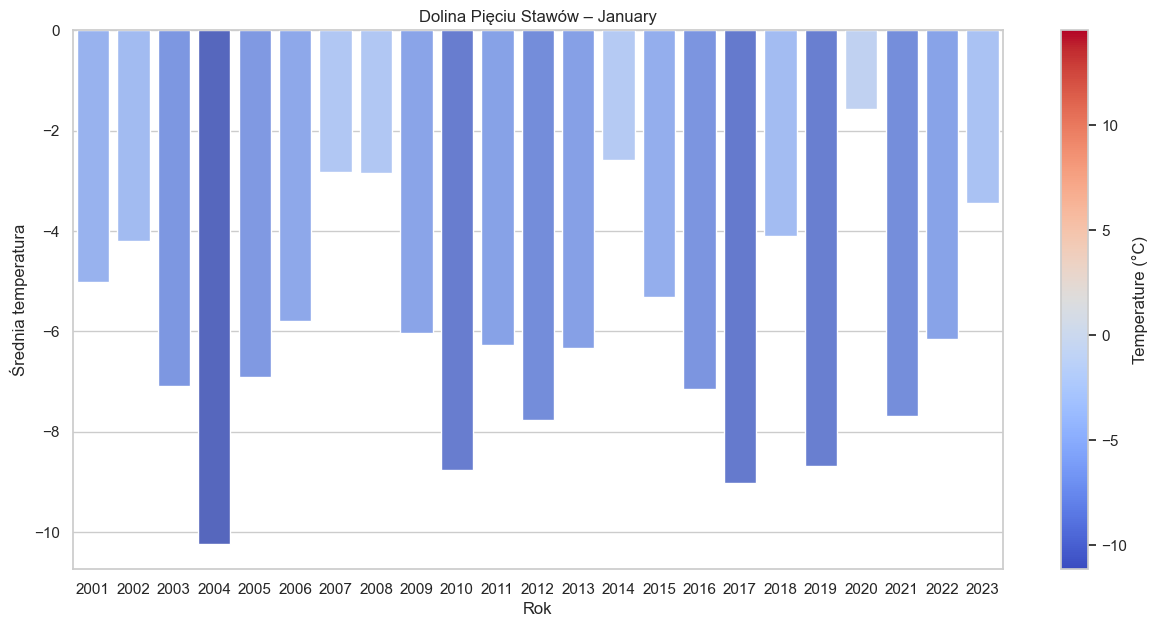

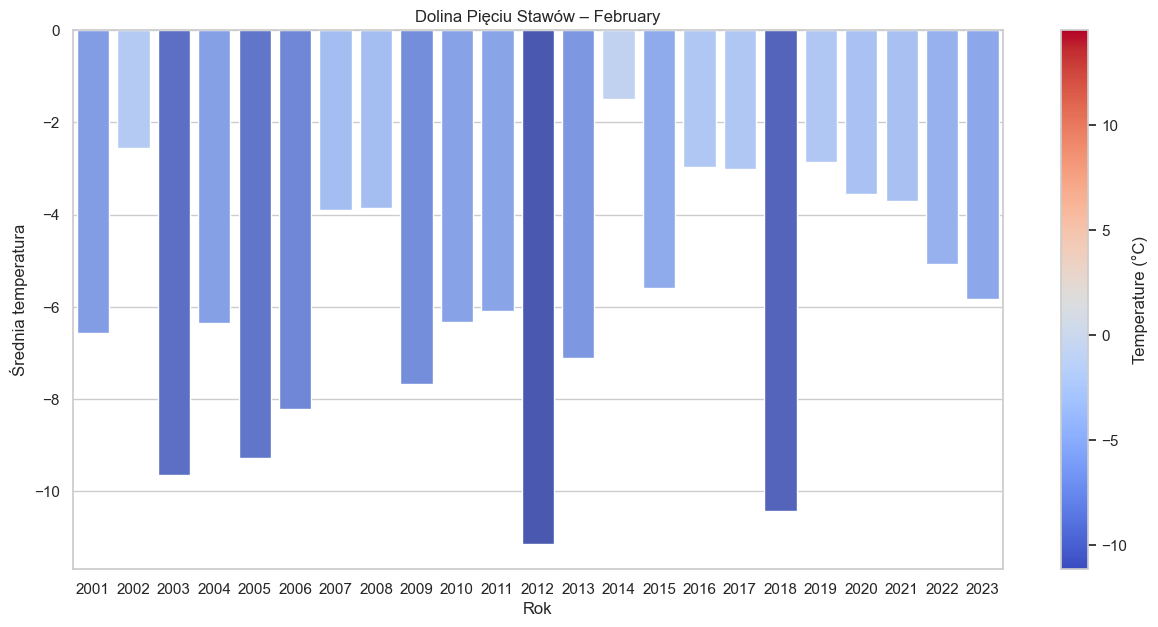

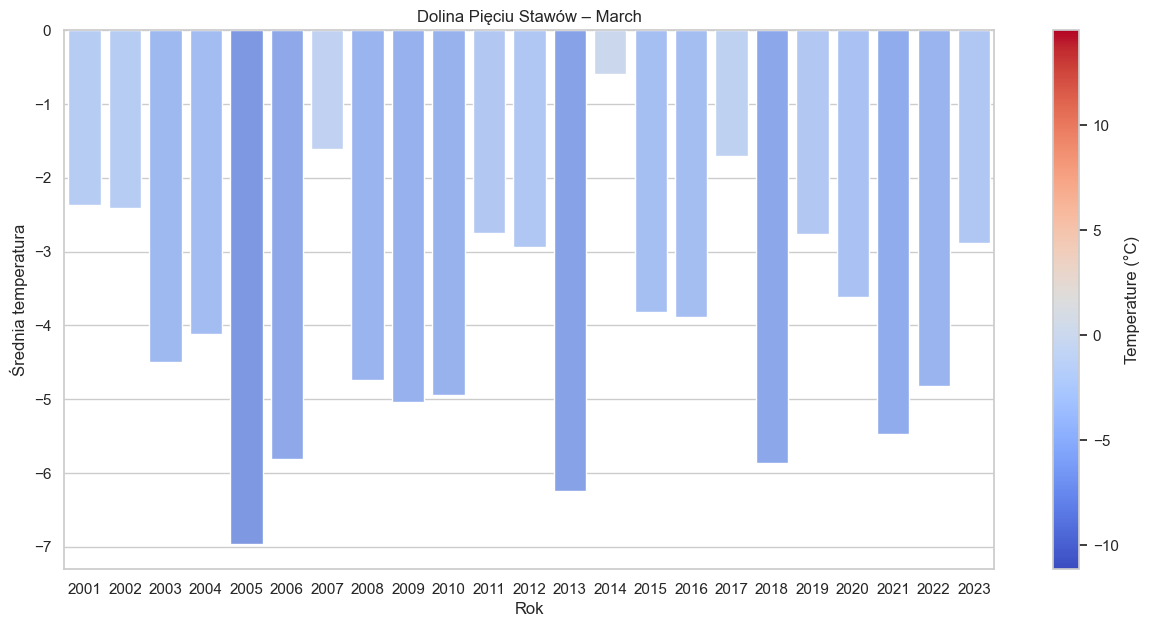

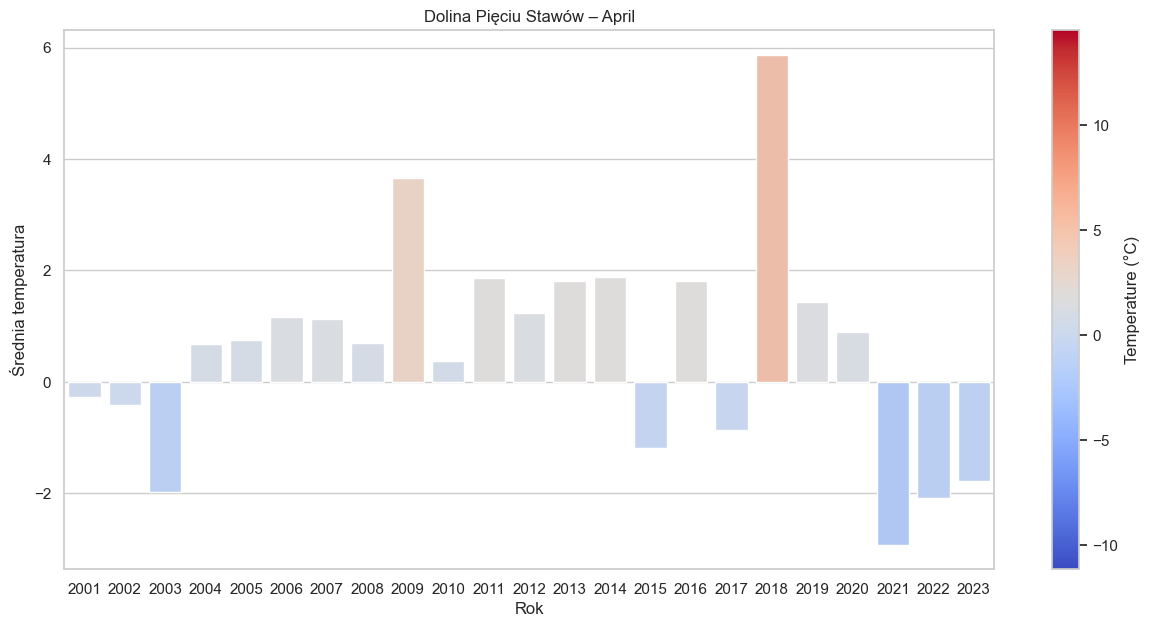

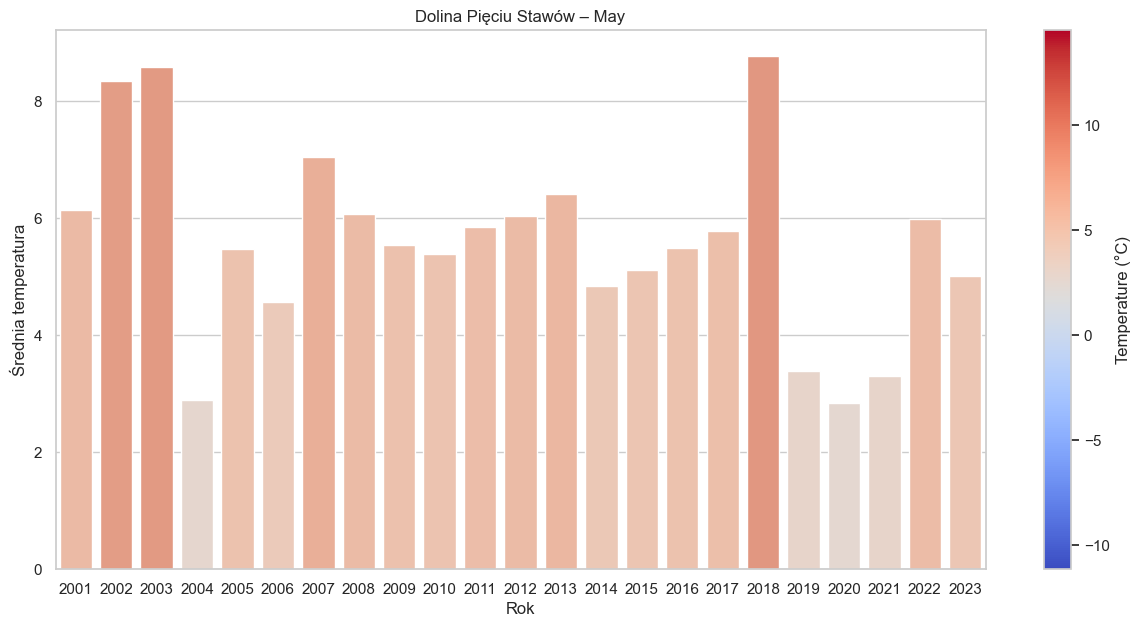

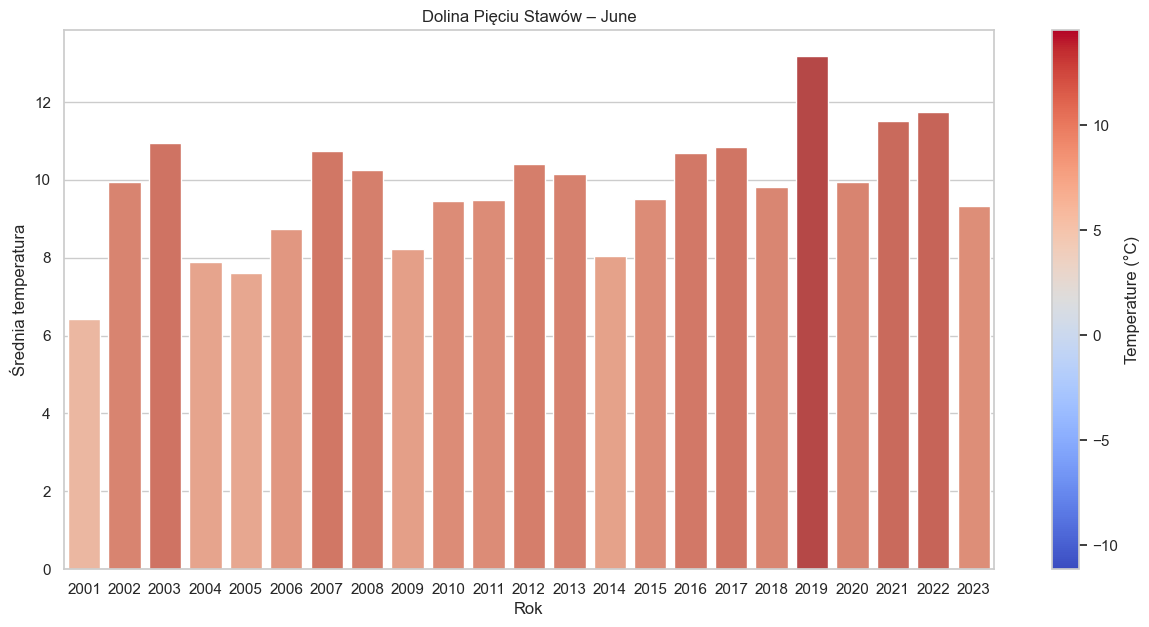

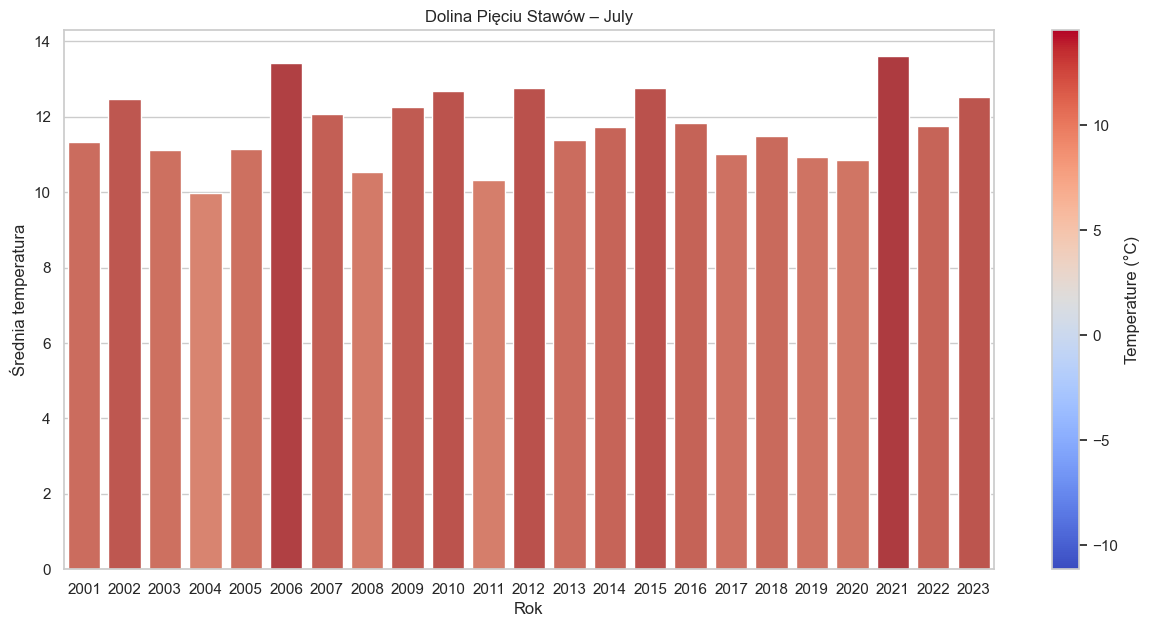

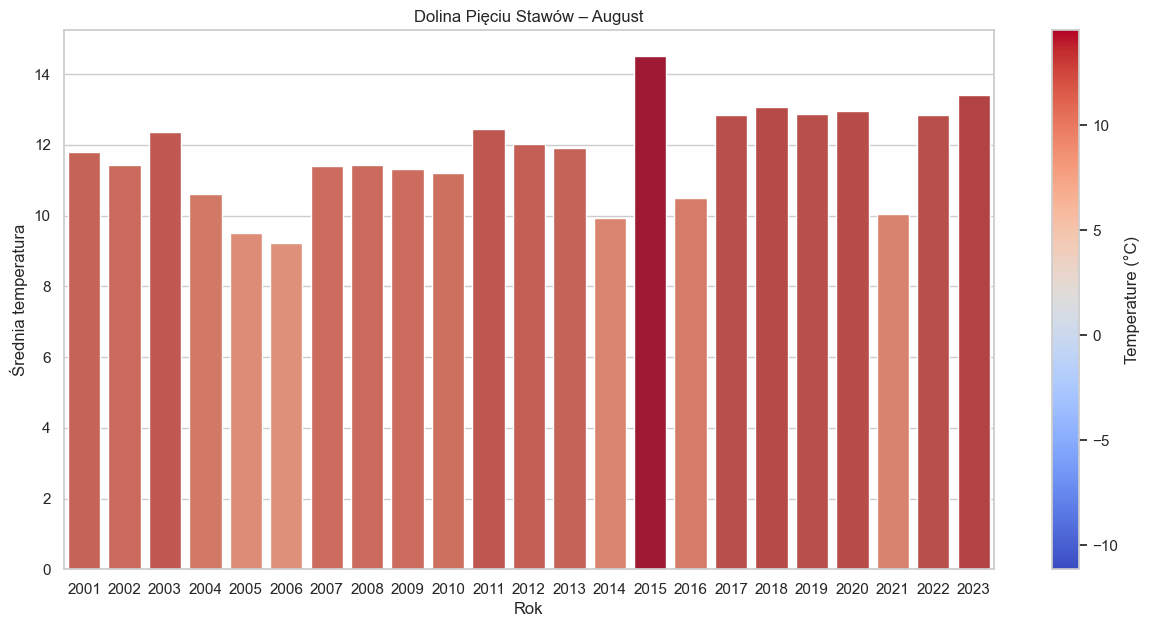

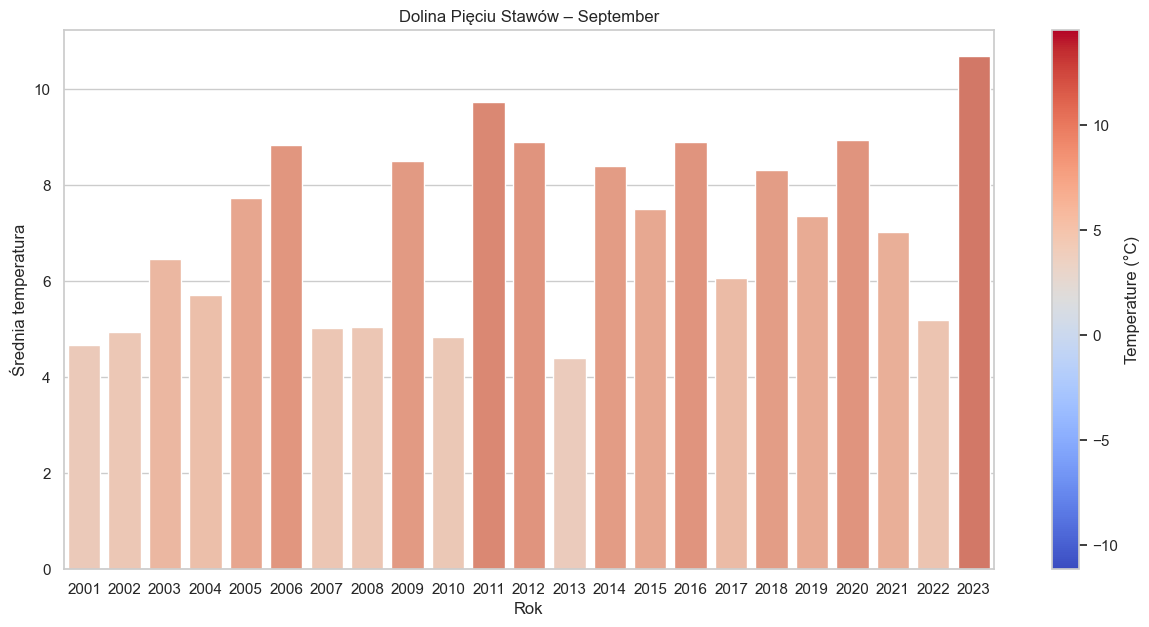

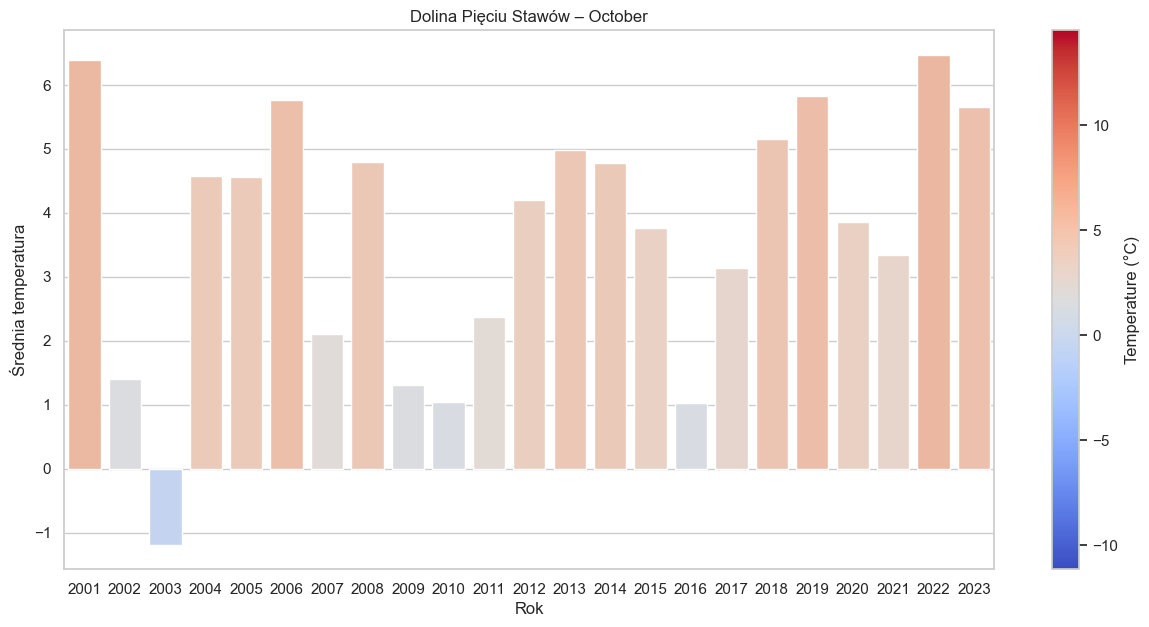

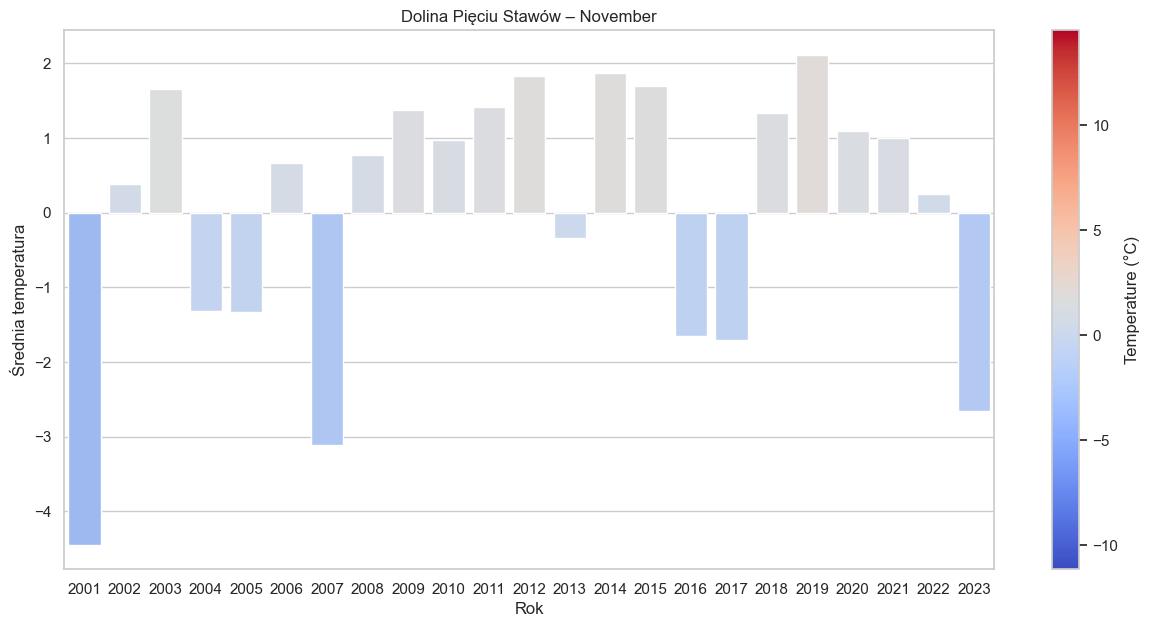

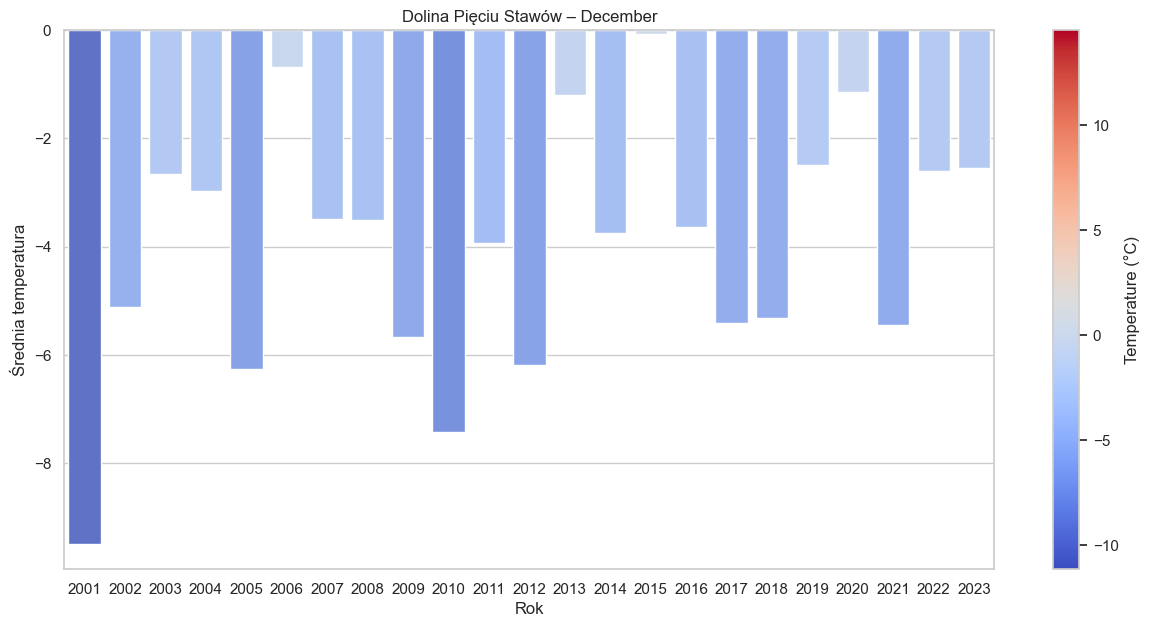

In [ ]:
norm = plt.Normalize(vmin=avg_multi_group['Średnia temperatura'].min(), vmax=avg_multi_group['Średnia temperatura'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)

avg_multi_group['Miesiąc'] = avg_multi_group['Miesiąc'].apply(lambda x: calendar.month_name[x])

for month in avg_multi_group['Miesiąc'].unique():
    month_data = avg_multi_group[avg_multi_group['Miesiąc'] == month]
    fig, ax = plt.subplots(figsize=(15, 7))

    colors = [sm.to_rgba(val) for val in month_data['Średnia temperatura']]

    sns.barplot(data=month_data, 
                 x='Rok',  
                 y='Średnia temperatura',
                 palette=colors,
                 hue='Rok',
                 legend=False
                 )
    
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=avg_multi_group['Średnia temperatura'].min(), vmax=avg_multi_group['Średnia temperatura'].max()))
    fig.colorbar(sm, ax=ax, label='Temperature (°C)')
    plt.title(f"Dolina Pięciu Stawów – {month}")
    plt.show()

Część 3:
Wykrywanie anomalii

In [220]:
df['delta'] = df['Maksymalna temperatura'] - df['Minimalna temperatura']

df[df['delta'] > 27].sort_values(by='delta', ascending=False).head(100)

,Stacja,Rok,Miesiąc,Dzień,Maksymalna temperatura,Minimalna temperatura,Średnia temperatura,delta
235998,STUPOSIANY,2005,2,8,0.3,-32.3,-20.5,32.6
235999,STUPOSIANY,2005,2,9,2.9,-29.4,-17.5,32.3
235997,STUPOSIANY,2005,2,7,-0.6,-32.7,-21.1,32.1
167516,JABŁONKA,2003,12,26,14.4,-17.6,-3.3,32.0
235941,KOMAŃCZA,2005,2,7,3.0,-28.9,-17.7,31.9
235943,KOMAŃCZA,2005,2,9,4.9,-26.3,-15.2,31.2
235942,KOMAŃCZA,2005,2,8,4.1,-26.7,-15.8,30.8
236000,STUPOSIANY,2005,2,10,1.4,-28.8,-15.3,30.2
235996,STUPOSIANY,2005,2,6,-2.3,-32.0,-21.1,29.7
121157,STUPOSIANY,2003,2,26,6.6,-23.0,-9.3,29.6
